<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020)</h2>
<h2 align="center">Lab 6: Ensemble Methods </h2>
<h3 align="center">Eng. Ahmed Wael</h3>

# Lab Objectives:

- Understanding the idea of Ensemble Learning


- Understanding the idea of Bootstraping


- Understanding the idea of Bagging


- What do we mean by Out-Of-Bag (OOB) Error


- Implementing Random Forests from scratch to understand the last three points better


- Discuss the different hyberparamaters of the RF


- Understaing the idea of Boosting


- Discuss AdaBoost, one of the most famous Boosting Algorithms

# Importing the libraries

In [ ]:
import numpy as np

from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

from decision_tree import MyDecisionTree ## Our implementation from lab 5

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import rcParams


# Exploring the Dataset : 
We are going you use the same dataset from the last lab

In [ ]:
data = pd.read_csv("adult_data.csv")

categorical = ['workclass', 'education', 'marital_status', 'occupation', 
                   'relationship', 'c1', 'c2', 'c3']
numerical = ['age', 'education_num','capital_gain', 'capital_loss',
                'hours_per_week']
 
X = pd.concat([data[categorical], data[numerical]], axis=1) ## Just sort them, no need for encoding
y = data['eligible']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)
X_train , X_test , y_train , y_test = X_train.to_numpy() , X_test.to_numpy() , y_train.to_numpy() , y_test.to_numpy()
data.head()

,age,workclass,state_sample,education,education_num,marital_status,occupation,relationship,c1,c2,capital_gain,capital_loss,hours_per_week,c3,eligible
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,c14,c21,2174,0,40,c337,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,c14,c21,0,0,13,c337,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,c14,c21,0,0,40,c337,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,c12,c21,0,0,40,c337,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,c12,c20,0,0,40,c34,0


# What is Ensemble Learning?

- **Combine many mediocre (weak) models in a one super model.**

## Ensemble Learning [Example](https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/)

- I want to invest in some company, but I am not sure about its performance though. 


- So, I look for advice on whether the stock price will increase more than 6% per annum or not? 


- I decide to approach various experts having **diverse** domain experience:

1. **Employee of the Company:** 
    - *Good At :*
    
        - Knows the internal functionality of the company
        
        - Has the insider information about the functionality of the firm.
    
    - *Bad At :*
        - Lacks a broader perspective on how are competitors innovating.
   
        - Lacks on how is the technology evolving and what will be the impact of this evolution on the Company's product. 
   
    - *Accuracy:*
        - In the past, he has been right 70% times.


2. **Financial Advisor of the Company:** 
    - *Good At :*
    
        - Has a broader perspective on how companies strategy will fair of in this competitive environment.
            
    - *Bad At :*
        - Lacks a view on how the company’s internal policies are fairing off
        
    - *Accuracy:*
        - In the past, he has been right 75% times.


3. **Stock Market Trader:**
    - *Good At :*
    
        - Observed the company’s stock price over past 3 years.
        - Knows the seasonality trends and how the overall market is performing.
        - Developed a strong intuition on how stocks might vary over time.
    - *Bad At :*
        - Doesn't now the internal of the company.
        
    - *Accuracy:*
        - In the past, he has been right 70% times.


4. **Employee of a competitor:**
    - *Good At :*
    
        - Knows the internal functionality of the competitor firms
        - Aware of certain changes which are yet to be brought.
    - *Bad At :*
        - Lacks a sight of company in focus and the external factors which can relate the growth of competitor with the company of subject.
        
    - *Accuracy:*
        - In the past, he has been right 60% times.


5. **Market Research team in same segment:**
    - *Good At :*
    
        - analyzes the customer preference of the company's product over others and how is this changing with time.
        - Aware of certain changes which are yet to be brought.
    - *Bad At :*
        - Unaware of the changes the company will bring because of alignment to its own goals, because he deals with customer side.
        
    - *Accuracy:*
        - In the past, he has been right 75% times.



6. **Social Media Expert:**
    - *Good At :*
    
        - Can help us understand how the company have positioned its products in the market
        - Can help us understand how are the sentiment of customers changing over time towards company.
    - *Bad At :*
        - Unaware of any kind of details beyond digital marketing.
        
    - *Accuracy:*
        - In the past, he has been right 65% times.

## What is the accuracy of the 6 experts combined?

$$1 - \prod Error(expert) $$

$$1 - (30\% \cdot 25\% \cdot 30\% \cdot 40\% \cdot 25\% \cdot 35\%) = 1 - 0.07875 = 99.92125\% $$

## What is the problem in this approach?

- We assume that all the predictions are **completely** independent on each other. Which doesn't make sense and not realistic at all.

## How to solve this problem?

- **Bagging:** **Parallel** training of **different** models using **overlapping** training sets. Also called *Bootstrap AGgregation* 


- **Boosting:** **Sequential** training by iteratively **re-weighting** training examples such that each model focuses on a different subset of **hard examples**

# Bootstrap Sampling:

## What does it address?

- Bootstrap address a very famous challenge in statistics.


- We only have sample of a population, but we want to collect information about the WHOLE population.


- How to make sure that this sample represent the whole population? It the mean of the sample is a good-enough approximation for the mean of the population?

## What is it?

- Instead of estimating the statistic - mean for example - only once, we do this many times.


- We do it using re-sampling **with replacement** of the original sample.

<img src = "https://miro.medium.com/max/875/1*iH5w0MBdiOlxDOCX6nmqqw.png">

<img src = "https://miro.medium.com/max/1250/1*y42mIxqot08pZq8_ZoFiXw.png">

# Bagging - *Bootstrap Aggregation* - :

## What is it?

Its basic idea is to create different models using **different bootstrapped**
training sets and **average** their prediction to produce the final output
of the model

## What is it good for?

- Reducing the variance of the model.


- Thus, reducing overfitting


- Outliers are likely omitted in some of the training bootstrap samples. 

<img src = "https://hudsonthames.org/wp-content/uploads/2019/09/bagging-1.png" >

## Bagging Steps:

1. Generate B different bootstrapped training data sets. 


2. Train our ML method on the *b* bootstrapped training set


3. $$\hat{f}(x) = \frac{1}{B}\sum\hat{f}^b(x)$$

## How to Calculate the test error in Bagging?

- By using the **Out-of-Bag Error (OOB) :**  The mean prediction error on each training sample *x*, using only the model that did not have *x* in their bootstrapped training set.

- No need to use cross-validation or hold-out samples in order to get an unbiased error estimation.

- Because, in Bagging, the error estimation takes place internally

<img src = https://miro.medium.com/max/875/1*HojoYXBU_DTnMuCatCnQaQ.png>

                Training                                              Testing

**What is the OOB here?**

- We have 15 points in the test set, that are NOT in the training set, right?


- The model classified 4 of these 15 incorrectly. 


- So, the accuracy is 11/15*100 = 73.33%


- Thus, we can say that the OOB estimate is nothing more than the mean estimate of the base algorithms on those ~37% of inputs that were left out of training.

## Variable Importance Measures:

- Bagging improves prediction accuracy at the expense on interpretability.


- For example, if we use it with decision trees, it is no longer clear which features are the most important.


- So, we calculate an overall summary of importance using Variable Importance Measures such as GINI index and RSS.

# Random Forests

A Random Forest is slightly modified Bagging algorithm.


It is basically a collection of **decorrelated** decision trees, built as follows

- For every tree: 

    1. We subsample the examples with replacement **Bootstraping**

    2. For each subsample, we choose attributes **at random**. We randomly pick features in each split. WHY?
    
    3. We build the tree ONLY on these random features and with the current subsample.

    
- Classification for a random forest is then done by taking a majority vote of the classifications yielded by each tree in the forest after it classifies an example.


## Random Forest Implementation

In [ ]:
class RandomForest(object):
    def __init__(self, n_estimators=50, max_depth=None, max_features=0.7):
        self.n_estimators = n_estimators ## how many estimators we are going to use?
        self.max_depth = max_depth ## Max depth 
        self.max_features = max_features ## the percentage of the RANDOM features we are going to use
        self.bootstraps_row_indices = [] ## Which examples are in the current bootstrap
        self.feature_indices = [] ## Keeping track of features indices
        self.out_of_bag = [] ## To calculate the out of bag error
        
        decision_trees = []
        for i in range(n_estimators):
            decision_trees.append(MyDecisionTree(max_depth=max_depth)) ## Call our DT class
        
        self.decision_trees = decision_trees ## Our random forest
        
        ## OR  self.decision_trees = [MyDecisionTree(max_depth=max_depth) for i in range(n_estimators)]
        
    def _bootstrapping(self, num_training, num_features): ## _ is similar to private in other programming language
        """
        - INPUT : 
            num_training: how many training examples in this bootstrap
            num_features: how many features in this bootstrap
            
        - OUTPUT :
        - row_idx: the row indices corresponding to the row locations of the selected samples in the original dataset.
        - col_idx: the column indices corresponding to the column locations of the selected features  
                   in the original feature list.
        
        
        
        - Randomly select a sample dataset of size num_training with replacement from the original dataset. 
        - Randomly select certain number of features (num_features denotes the total number of features in X,
          without replacement from the total number of features.
        """ 
        
        sample_size = list(range(num_training))
        row_idx = np.random.choice(sample_size,num_training) # Create random row indices
        col_idx = np.random.permutation(num_features)[:int(num_features*self.max_features)] ## Permutation ( with replacement)
        return row_idx, col_idx
            
    def bootstrapping(self, num_training, num_features):
        """
        Initializing the bootstap datasets for each tree
        """
        
        for i in range(self.n_estimators):
            total = set(list(range(num_training))) ## we use a set to get the unique elements
            row_idx, col_idx = self._bootstrapping(num_training, num_features)
            out_of_bag_examples = total - set(row_idx) ## again we use a set. Subtract the row indices from the total
            self.bootstraps_row_indices.append(row_idx)
            self.feature_indices.append(col_idx)
            self.out_of_bag.append(out_of_bag_examples) ## total is used for the OOB 
            
            
    def fit(self, X, y):
        """
        Train decision trees using the bootstrapped datasets.
        """
        
        num_training, num_features = X.shape
        self.bootstrapping(num_training,num_features) ## initialize the bootstrapping
        for i in range((self.n_estimators)): ## loop over the trees 
            current_bootstraps_row_indices = self.bootstraps_row_indices[i]
            current_feature_indices = self.feature_indices[i]
            current_X = X_train[current_bootstraps_row_indices[:,np.newaxis], current_feature_indices] ## data for this tree
            current_y = y[current_bootstraps_row_indices]
            current_dt = self.decision_trees[i]
            current_dt.fit(current_X,current_y, 0) ## 0 for the initial depth
            print("Current Tree to fit : " ,i+1) ## Which tree we are using
            
            
    def OOB_score(self, X, y):
        """
        Calculate the OOB score
        """
        
        accuracy = []
        for i in range(len(X)): ## Loop over the full dataset
            predictions = []
            for t in range(self.n_estimators): ## loop over each decision tree
                if i in self.out_of_bag[t]: ## the data that is NOT used in the current tree
                    predictions.append(self.decision_trees[t].predict(X[i][self.feature_indices[t]])) ## Predict
            if len(predictions) > 0:
                accuracy.append(np.sum(predictions == y[i]) / float(len(predictions))) ## Majority voting
        return np.mean(accuracy) ## Total accuracy

## Evaluate the Random Forest

In [ ]:
n_estimators = 30
max_depth = 5
max_features = 0.7

random_forest = RandomForest(n_estimators, max_depth, max_features)

random_forest.fit(X_train, y_train)
accuracy=random_forest.OOB_score(X_test, y_test)

print("accuracy: %.4f" % accuracy)

NameError: name 'max_depth' is not defined

## Compare out implementation with Sklearn Random Forest

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)

X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
clf = RandomForestClassifier(max_depth=5, n_estimators = 10 , criterion = 'entropy', oob_score = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Random Forest Pros and Cons


| Pros | Cons
| --- | --- 
|Robust to outliers| biased while dealing with categorical variables.
|Works well with non-linear data.|Slow Training.
|Lower risk of overfitting.|Not suitable for linear methods with a lot of sparse features
|Runs efficiently on a large dataset.|Greedy algorithms don’t yield the global optimum tree structure.



# Boosting 

<img src = https://quantdare.com/wp-content/uploads/2016/04/bb3.png>
<img src = https://miro.medium.com/max/875/1*wpVgt07J_TeH3jEdc3A50g.png>

# Adaboost - *ADAptive Boost* :

- Combining multiple weak classifiers to build one strong classifier


- with each one progressively learning from the others' wrongly classified objects


- Rather than being a model in itself, AdaBoost can be applied on top of any classifier to learn from its shortcomings and propose a more accurate model.


- Therefore, it is called *best out-of-the-box classifier*

## What do we mean by a Weak Classifier?

**A one that performs better than random guessing, but still performs poorly at designating classes to objects.**

- For example, a weak classifier may predict that everyone above the age of 40 could not run a marathon but people falling below that age could.


- You might get above 60% accuracy, but you would still be misclassifying a lot of data points!

## Decision Stumps

- Trees with just **one** node and two leaves.


- A stump can only use one variable to make a decision


- AdaBoost uses a forest of them instead of trees

## How AdaBoost works?

1. A weak classifier (e.g. a decision stump) is made on top of the training data based on the **weighted samples**.

- where each sample weight indicates how important it is to be correctly classified.


- Initially, for the first stump, we give all the samples equal weights.







2. We create a decision stump for each variable and see how well each stump classifies samples to their target classes.


- For example, in the diagram below we check for Age, Eating Junk Food, and Exercise. We'd look at how many samples are correctly or incorrectly classified as Fit or Unfit for each individual stump.

<img src=https://lh3.googleusercontent.com/kpQjxgGIxnSnMm495bDs0OZf4rE08E58PV1wwK9q10b_pL5AtKkRcY0OY5Hc_NFY0aW6iRQYAQDKuueEwnOfcEz9_IYyO-Ej-HwAqoFS_rQ779mP5HTHPKCy4x-lBmr33dd-Nw>

3. More weight is assigned to the incorrectly classified samples so that they're classified correctly in the next decision stump.


- Weight is also assigned to each classifier based on the accuracy of the classifier, which means high accuracy = high weight!

4. Reiterate from Step 2 until all the data points have been correctly classified, or the maximum iteration level has been reached.

<img src = https://blog.paperspace.com/content/images/2019/12/WhatsApp-Image-2019-12-30-at-11.55.02-AM.jpeg>

## Adaboost Equation

$$\alpha_t = \frac{1}{2}\ln\frac{1-TotalError}{TotalError}$$

- Alpha is how much influence this stump will have in the final classification. 


- Total Error is nothing but the total number of misclassifications for that training set divided by the training set size

<img src = https://i.ibb.co/J5ck9X9/adaboost-alphacurve.png>

- When alpha is zero, the error rate is equal to the random chance - 0.5 - 


- When alpha is a positive number, the error rate decreases, which means we have a perfect decision stump

$$w_i = w_{i-1} \cdot e^{\pm\alpha}$$

- Alpha is positive when the predicted and the actual output agree (the sample was classified correctly). In this case we **decrease** the sample weight from what it was before, since we're already performing well.


- Alpha is negative when the predicted output does not agree with the actual class (i.e. the sample is misclassified). In this case we need to **increase** the sample weight so that the same misclassification does not repeat in the next stump. This is how the stumps are dependent on their predecessors.

## AdaBoost Pseduocode

- Initially set uniform example weights.



- for Each base learner do:
    1. Train base learner with a weighted sample.
    2. Test base learner on all data.
    3. Set learner weight with a weighted error.
    4. Set example weights based on ensemble predictions.
- end for

## Bagging vs Boosting

- Bagging is easy to parallelize and hence training is faster



- Boosting is more efficient for fixed number of iterations (classifiers)

# Sources

1. https://www.datacamp.com/community/tutorials/ensemble-learning-python


2. https://blog.paperspace.com/tag/series-ensemble-methods/


3. https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-5-ensembles-of-algorithms-and-random-forest-8e05246cbba7


4. https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60


5. https://datasciencechalktalk.com/2019/11/12/bootstrap-sampling-an-implementation-with-python/


6. https://blog.paperspace.com/adaboost-optimizer/



# Tasks

## 3 points: Work with the [Vehicle regression dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

### Load the dataset, perform all necessary data exploration and preprocessing

In [ ]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

#copying the dataset to a new one that will be cleaned
df_clean = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### Assessing
1- There appears to be no missing values in the dataset.


2- It is more convenient to store `fuel`, `seller_type`, `transmission` and `owner` columns as **"category"** datatype instead of object.

reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

### Cleaning

In [ ]:
df_clean['fuel'] = df_clean['fuel'].astype('category')
df_clean['seller_type'] = df_clean['seller_type'].astype('category')
df_clean['transmission'] = df_clean['transmission'].astype('category')
df_clean['owner'] = df_clean['owner'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4340 non-null   object  
 1   year           4340 non-null   int64   
 2   selling_price  4340 non-null   int64   
 3   km_driven      4340 non-null   int64   
 4   fuel           4340 non-null   category
 5   seller_type    4340 non-null   category
 6   transmission   4340 non-null   category
 7   owner          4340 non-null   category
dtypes: category(4), int64(3), object(1)
memory usage: 153.3+ KB


In [ ]:
df_clean.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


The min of `km_driven` equals one, this might be an error.

In [ ]:
#Checking the values of each column

v_c = {}
for col in df_clean.columns:
    v_c [col] = [df_clean[col].value_counts()]
v_c


{'name': [Maruti Swift Dzire VDI                  69
  Maruti Alto 800 LXI                     59
  Maruti Alto LXi                         47
  Maruti Alto LX                          35
  Hyundai EON Era Plus                    35
                                          ..
  Hyundai Grand i10 Asta Option AT         1
  Volkswagen Jetta 2.0 TDI Comfortline     1
  Hyundai Grand i10 Nios Sportz            1
  Renault Duster Petrol RxL                1
  Maruti Ertiga BSIV ZXI                   1
  Name: name, Length: 1491, dtype: int64],
 'year': [2017    466
  2015    421
  2012    415
  2013    386
  2014    367
  2018    366
  2016    357
  2011    271
  2010    234
  2019    195
  2009    193
  2008    145
  2007    134
  2006    110
  2005     85
  2020     48
  2004     42
  2003     23
  2002     21
  2001     20
  1998     12
  2000     12
  1999     10
  1997      3
  1996      2
  1995      1
  1992      1
  Name: year, dtype: int64],
 'selling_price': [300000     162
  250

We may change the values of `owner` column to be **0, 1, 2, 3, 4** indtead of **'Test Drive Car'**, **'First Owner'**, **'Second Owner'**, **'Third Owner'**, **'Fourth & Above Owner'**. Or we may perform one hot encoding.

### Visualizations 

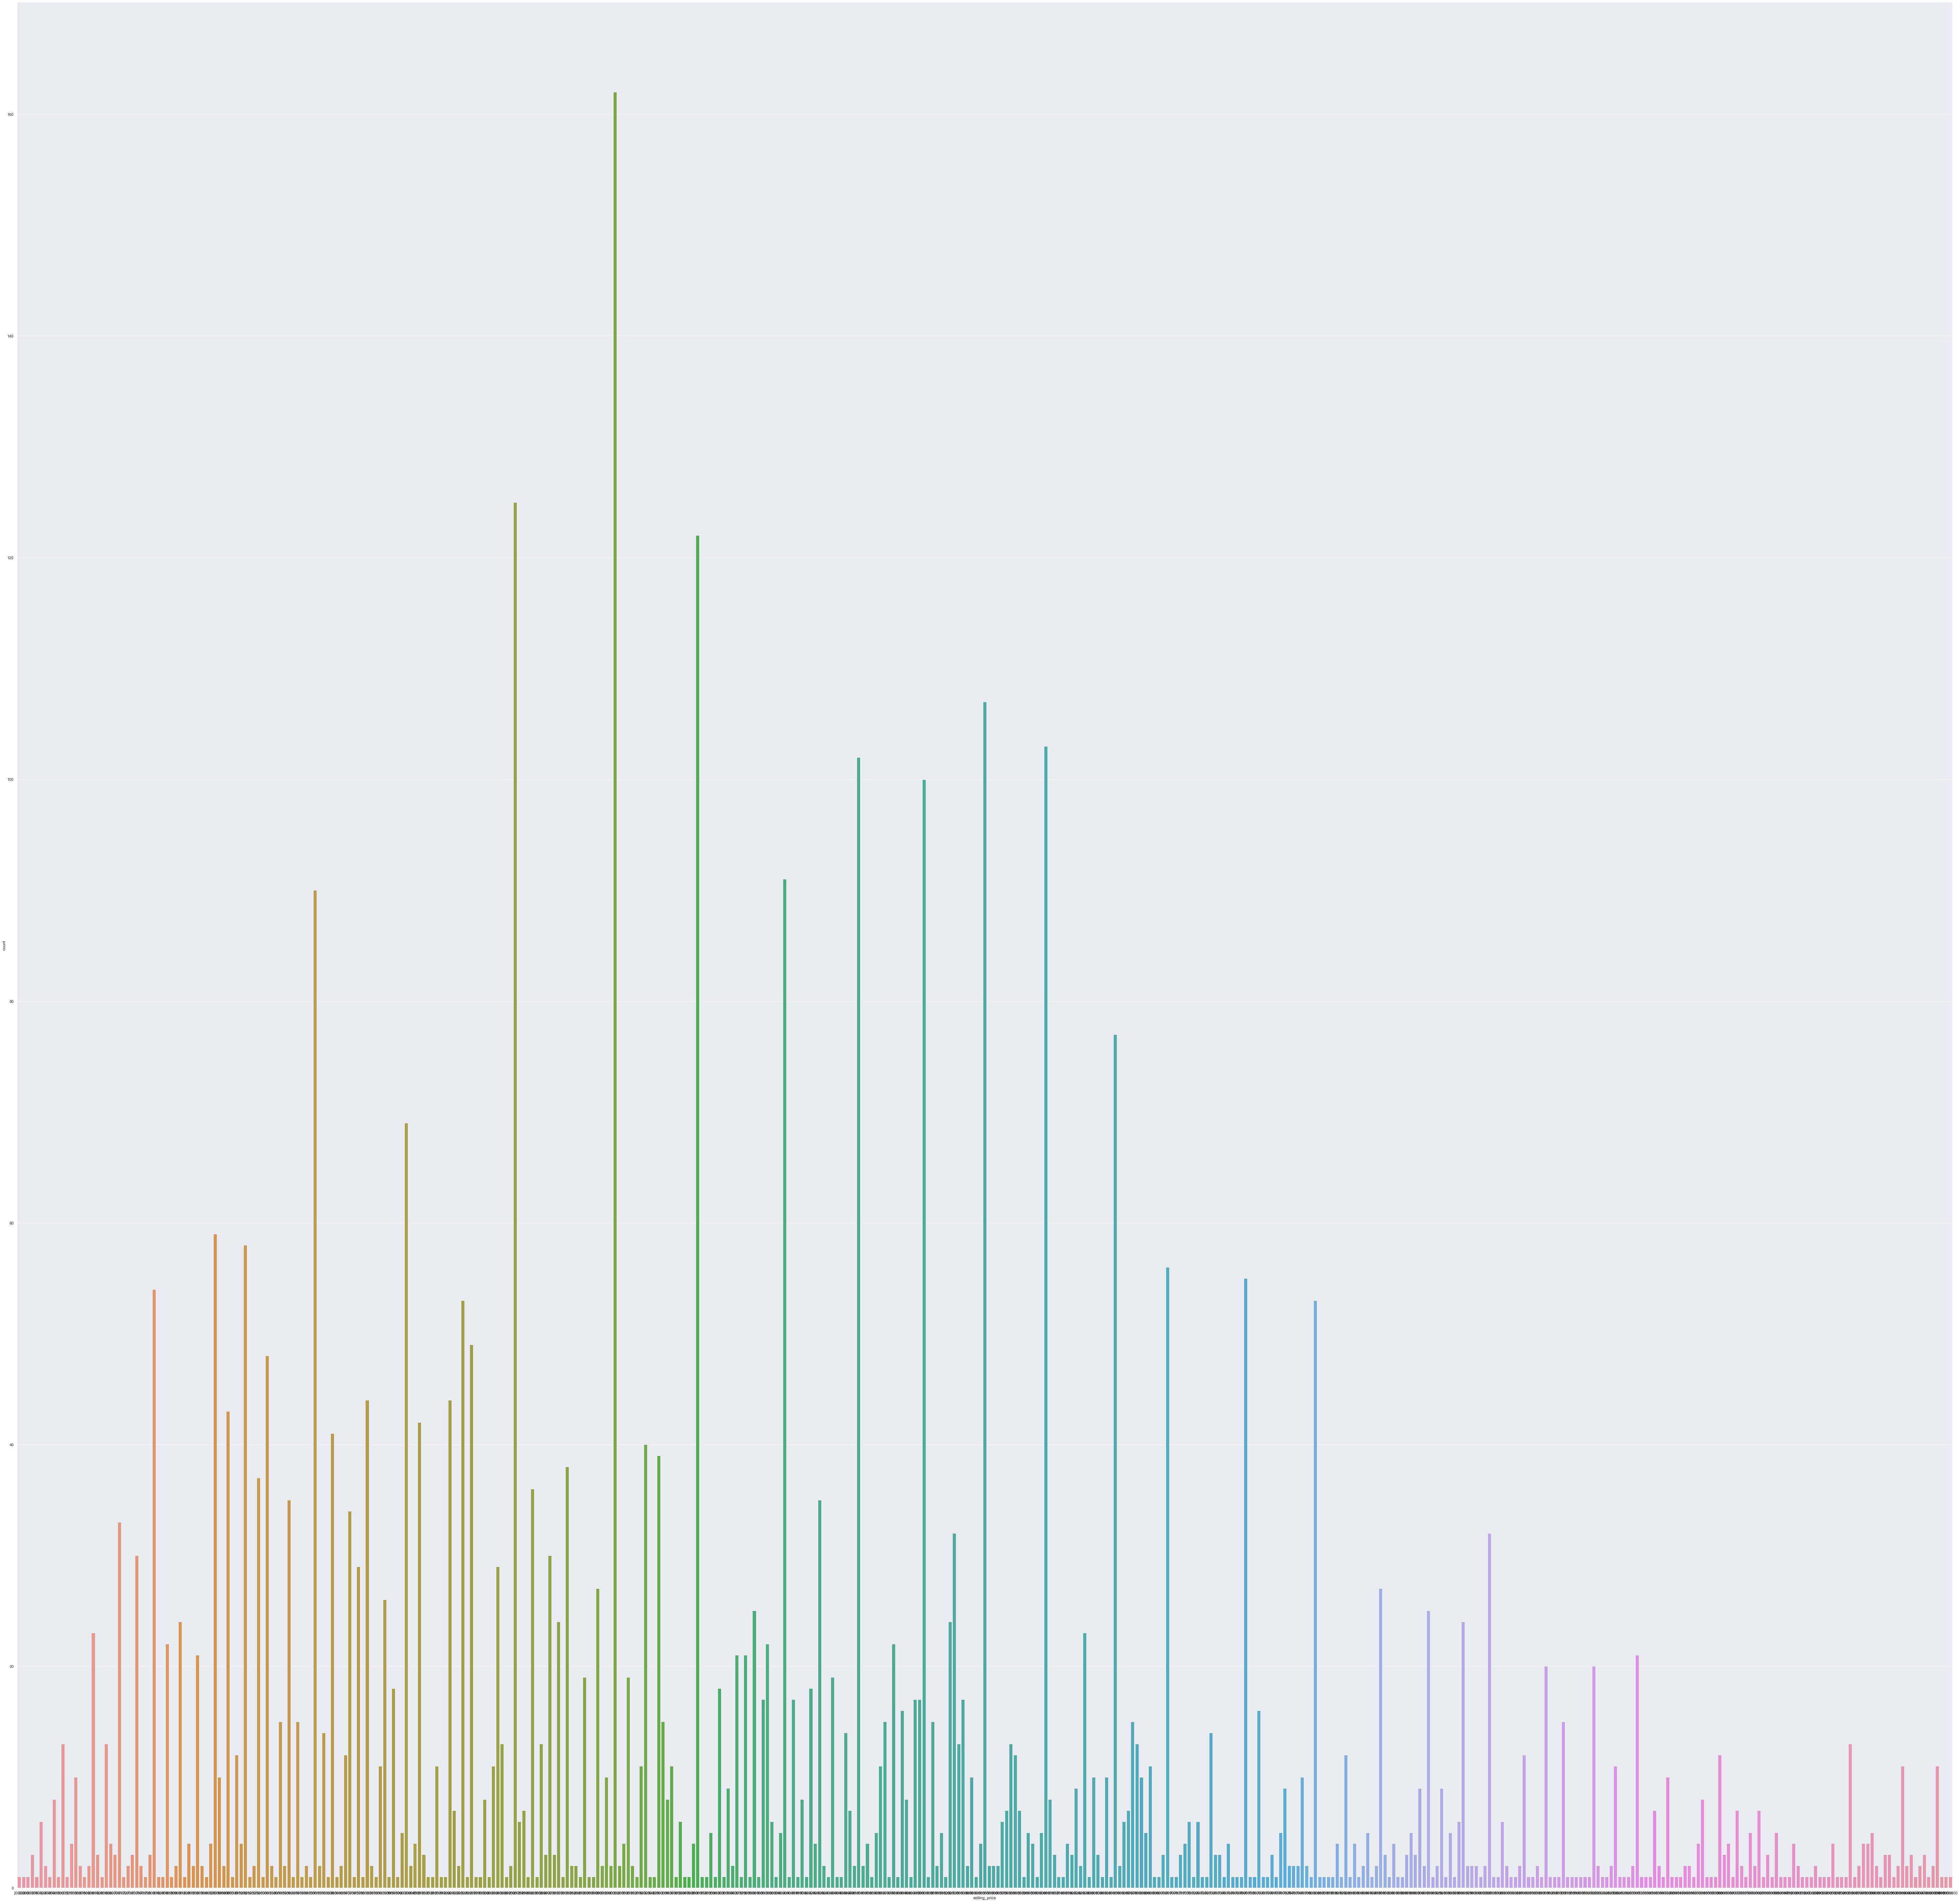

In [ ]:
sns.countplot(x='selling_price',data=df_clean);


In [ ]:
# figure size in inches
rcParams['figure.figsize'] = 100,100

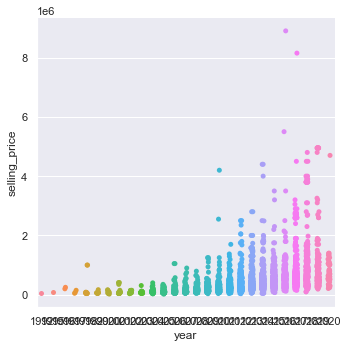

In [ ]:
sns.catplot(x="year", y="selling_price", data=df_clean);

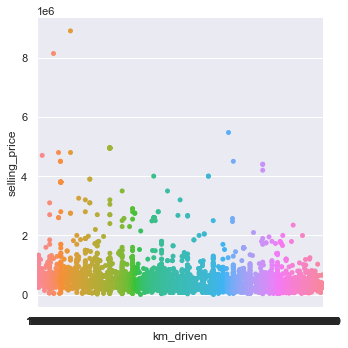

In [ ]:
sns.catplot(x="km_driven", y="selling_price", data=df_clean);

In [ ]:
#df_clean.plot(kind="scatter", x='name', y='selling_price');


In [ ]:
#c = list(df.columns)
#for i in range(1,len(c)):
#    df_clean.plot(kind="scatter", x=c[i-1], y=c[i])


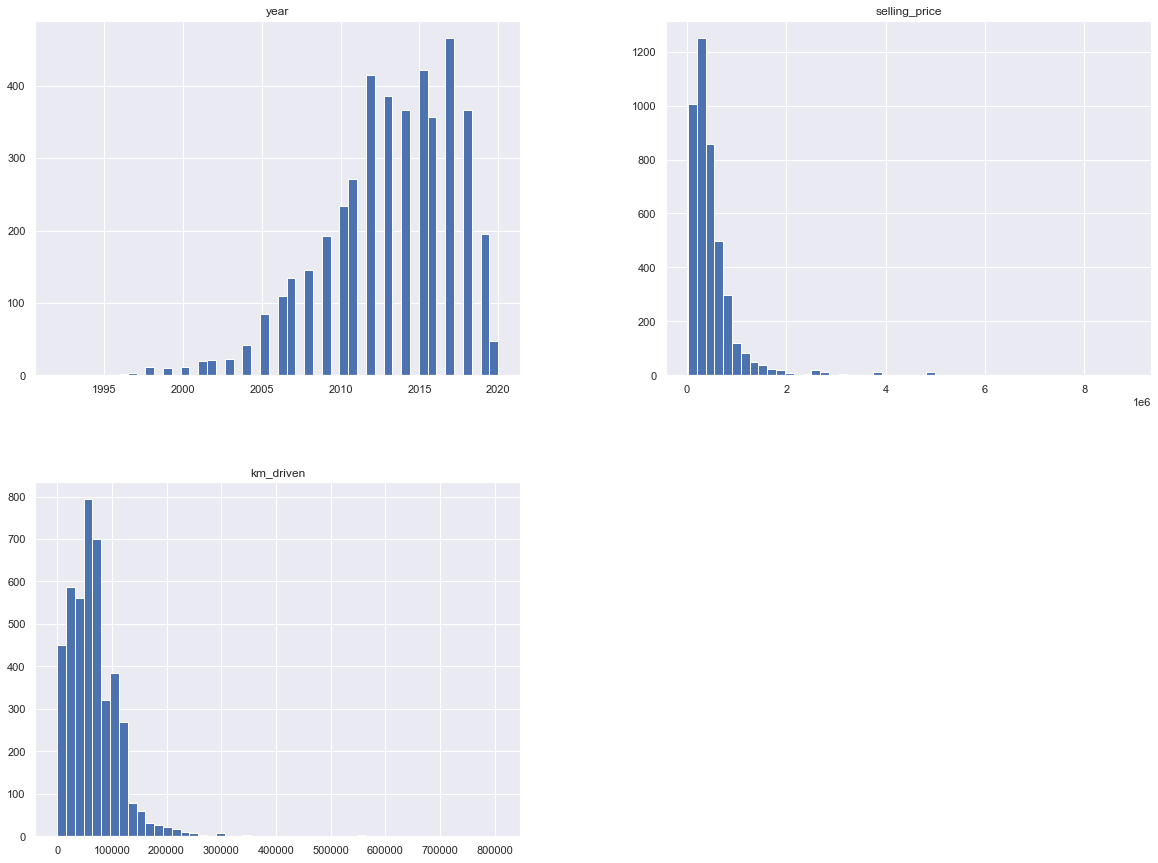

In [ ]:
df_clean.hist(bins=50, figsize=(20,15))
plt.show()

### Checking which features are mostly correlated to the target

In [ ]:
corr_matrix = df_clean.corr()

corr_matrix["selling_price"].sort_values(ascending=False)

selling_price    1.000000
year             0.413922
km_driven       -0.192289
Name: selling_price, dtype: float64

### Perform one hot encoding

In [ ]:
categorical = ['fuel', 'seller_type', 'transmission', 'owner']   
#name is not here since it has so many unique values, if we encode it we will have 1503 columns!
#However, we could change the name values to be 'Maruti', 'Hyundai', 'Datsun', 'Honda' and so on,
#without the details of the name, in this way, we will have less unique names in the 'name' column.

numerical = ['year', 'km_driven']

X = pd.concat([df_clean[categorical], df_clean[numerical]], axis=1) ## Just sort them

y = df_clean['selling_price']

#One hot encoding
X = pd.get_dummies(X,drop_first=True)

df_clean = pd.concat([X,y], axis=1)

### Checking the correlations again after encoding

In [ ]:
corr_matrix = df_clean.corr()

corr_matrix["selling_price"].sort_values(ascending=False)

selling_price                   1.000000
year                            0.413922
fuel_Diesel                     0.282947
seller_type_Trustmark Dealer    0.110176
owner_Test Drive Car            0.048799
fuel_Electric                  -0.005095
fuel_LPG                       -0.042434
owner_Fourth & Above Owner     -0.078725
owner_Third Owner              -0.111326
owner_Second Owner             -0.161986
km_driven                      -0.192289
seller_type_Individual         -0.236798
fuel_Petrol                    -0.269453
transmission_Manual            -0.530205
Name: selling_price, dtype: float64

#### The `year` feature appears to have the highest positive correlation. While the `transmission_Manual` feature appears to have the highest negative correlation.

### Split the data into train and test 

In [ ]:
#Train,test split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)


## 3 Points: Use Sklearn Random Forest Regressor as the ML model

In [ ]:
#Random Forest Regression fitting and predicting
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)


In [ ]:
# Calculating R^2 metric to assess the model
print("R^2 metric:", regr.score(X_test, y_test) )

# before cleaning, R^2 metric: 0.4943483415797354

#r2_score(y_test, y_predicted)

R^2 metric: 0.4943483415797354


### Perform proper hyperparameter tuning to choose the best base model, depth, max_features, and any other important hyper-parameters 

In [ ]:
#hyper-parameters to be tuned
parameters = {'n_estimators':list(range(50,251,50)), 'max_depth':list(range(4,7)),
             'max_features': ['auto', 'log2'] }

#Using Grid Search to tune these hyper-parameters
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [ ]:
#The best hyper-parameters found using Grid Search
print(clf.best_params_)

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 50}


In [ ]:
#y_pred = clf.predict(X_test)

# Calculating R^2 metric to assess the model
print("R^2 metric:", clf.score(X_test, y_test) )

# before cleaning, R^2 metric: 0.756080891896676


R^2 metric: 0.756080891896676


## 4 Points: Use Sklearn AdaBoost on the same dataset and compare the results with the RF

In [ ]:
#AdaBoost Regression fitting and predicting
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)


In [ ]:
# Calculating R^2 metric to assess the model
print("R^2 metric:", regr.score(X_test, y_test) )

#before cleaning, R^2 metric: 0.48125740908409176


R^2 metric: 0.48125740908409176


### Hyperparameter tuning

In [ ]:
#hyper-parameters to be tuned
parameters = {'n_estimators':list(range(50,251,50)), 'learning_rate':list(np.arange(1,2,0.5)),
             'loss': ['linear', 'square'] }

#Using Grid Search to tune these hyper-parameters
adaBoost = AdaBoostRegressor()
clf = GridSearchCV(adaBoost, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1.0, 1.5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [ ]:
#The best hyper-parameters found using Grid Search
print(clf.best_params_)

{'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 150}


In [ ]:
# Calculating R^2 metric to assess the model
print("R^2 metric:", clf.score(X_test, y_test) )

#before cleaning, R^2 metric: 0.5098663414330425


R^2 metric: 0.5098663414330425


### Comparing the results with the RF¶
The performance of Random Forest Regressor appears to be better than Ada Boost Regressor in this specific dataset

## Bonus Task ( 3 Points ) : Use another Boosting Algorithm, such as XGBoost, on the same dataset. 

### You need to explain in details how the algorithm work and how it is different from AdaBoost in order to receive any credit.